## KSV Economy: Increasing moral hazard


Shows vector field --- two step map --- as $v(1)$ increases.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from phase_plot import phase_plot
from world_econ import *

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Generic code for phase plots:

In [3]:
def phase_plot(ax, g, h, 
               xmin, xmax, ymin, ymax, 
               gridsize=100):
    """
    Plots the phase diagram for the system x' = g(x,y), y' = h(x,y)
    over the square [xmin, xmax] times [ymin, ymax].
    """

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    delta_g = np.vectorize(lambda x, y: x - g(x, y))
    delta_h = np.vectorize(lambda x, y: y - h(x, y))
    xgrid = np.linspace(xmin, xmax, gridsize)
    ygrid = np.linspace(ymin, ymax, gridsize)
    X, Y = np.meshgrid(xgrid, ygrid)
    Zg, Zh = delta_g(X, Y), delta_h(X, Y)
 
    ax.contour(X, Y, Zg, [.0], alpha=0.8)
    ax.contour(X, Y, Zh, [.0], alpha=0.8)

    def draw_arrow(x, y):
        eps = 0.0001
        v1, v2 = g(x, y) - x, h(x, y) - y
        nrm = np.sqrt(v1**2 + v2**2)
        scale = eps / nrm
        ax.arrow(x, y, scale * v1, scale * v2,
                antialiased=True, 
                alpha=0.8,
                head_length=0.025*(xmax - xmin), 
                head_width=0.012*(xmax - xmin),
                fill=False)

    xgrid = np.linspace(xmin * 1.1, xmax * 0.95, 12)
    ygrid = np.linspace(ymin * 1.1, ymax * 0.95, 12)
    for x in xgrid:
        for y in ygrid:
            draw_arrow(x, y)

theta = 5.032551011087045
Stability measure: 
0.552890900545



theta = 7.361413830214618
Stability measure: 
0.808746640204



theta = 10.61621629992643
Stability measure: 
1.16632884148



theta = 15.162902849098334
Stability measure: 
1.6658412389





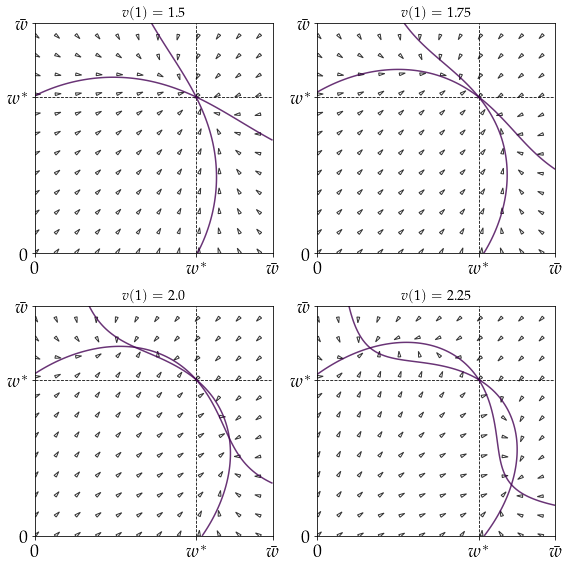

In [5]:

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()
v1s = 1.5, 1.75, 2.0, 2.25

for ax, v1 in zip(axes, v1s):

    title = f'$v(1) = {v1}$'
    country = Country(v1=v1, z=3, alpha=0.55)

    alpha, R, theta, wstar = country.alpha, country.R, country.theta, country.wstar
    ax.set_title(title, fontsize=14)

    xmin = 1e-5
    xmax = (1 - alpha) * R**alpha - 1e-5

    print(f"theta = {theta}")
    print("Stability measure: ")
    print((2 * alpha - 1) * theta * wstar / (1 - alpha))
    print("\n\n")

    ax.set_xticks((xmin, wstar, xmax))
    ax.set_xticklabels((r'$0$', r'$w^*$', r'$\bar w$'), fontsize=18)
    ax.set_yticks((xmin, wstar, xmax))
    ax.set_yticklabels((r'$0$', r'$w^*$', r'$\bar w$'), fontsize=18)
    ax.vlines([wstar], xmin, xmax, linestyles='--', lw=0.8)
    ax.hlines([wstar], xmin, xmax, linestyles='--', lw=0.8)

    def g0(x, y):
        "Law of motion for country X"
        r = integrated_world_r(country, x, country, y)
        phi_x = country.phi(x, r)
        return (1 - alpha) * (phi_x * R)**alpha

    def h0(x, y):
        "Law of motion for country Y"
        r = integrated_world_r(country, x, country, y)
        phi_y = country.phi(y, r)
        return (1 - alpha) * (phi_y * R)**alpha

    def g(x, y):
        xp, yp = g0(x, y), h0(x, y)
        return g0(xp, yp)

    def h(x, y):
        xp, yp = g0(x, y), h0(x, y)
        return h0(xp, yp)

    phase_plot(ax, g, h, xmin, xmax, xmin, xmax, gridsize=100)

plt.tight_layout()
plt.savefig("changing_v1.pdf")
plt.show()